In [1]:
print('Hi')

Hi


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")


In [3]:
model="llama-3.1-8b-instant"

In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name=model)
llm.invoke("hi")

e:\Agentic-AI-code\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 36, 'total_tokens': 44, 'completion_time': 0.010143706, 'prompt_time': 0.001803314, 'queue_time': 0.048186766, 'total_time': 0.01194702}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_33e8adf159', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--51421c69-42da-4fdc-bfe3-b7cc06f30085-0', usage_metadata={'input_tokens': 36, 'output_tokens': 8, 'total_tokens': 44})

In [5]:
llm=ChatGroq(model_name=model)

In [6]:
print(llm.invoke("Hi , how are you?").content)

I'm just a computer program, so I don't have feelings, but thanks for asking. I'm functioning properly and ready to help with any questions or tasks you may have. How can I assist you today?


In [ ]:
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt.tool_node import ToolNode

In [ ]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}


In [9]:
state={"messages":["hi hello how are you?"]}
call_model(state)


{'messages': [AIMessage(content="Hello, nice to meet you. I'm just a computer program, so I don't have feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you may have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 50, 'prompt_tokens': 41, 'total_tokens': 91, 'completion_time': 0.061040292, 'prompt_time': 0.002172573, 'queue_time': 0.052064017, 'total_time': 0.063212865}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--782b0bc7-21dc-403b-a757-f3edf32048bf-0', usage_metadata={'input_tokens': 41, 'output_tokens': 50, 'total_tokens': 91})]}

In [10]:
workflow= StateGraph(MessagesState)

In [11]:
workflow.add_node("Bot" , call_model)

In [12]:
workflow.add_edge(START , "Bot" )

In [13]:
workflow.add_edge("Bot" ,END)

In [14]:
app = workflow.compile()

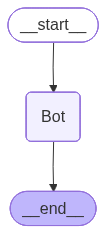

In [15]:
from IPython.display import Image ,display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
input={"messages":["hi hello how are you?"]}

In [19]:
app.invoke(input)


{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='ba090605-88c7-4064-a500-c85a32d2debe'),
  AIMessage(content="Hello. I'm doing well, thanks for asking. It's nice to chat with you. Is there something I can help you with or would you like to talk about something in particular?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 41, 'total_tokens': 80, 'completion_time': 0.050282664, 'prompt_time': 0.002411484, 'queue_time': 0.051293596, 'total_time': 0.052694148}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--5e716a32-02b5-4548-8b78-cd443c7106cf-0', usage_metadata={'input_tokens': 41, 'output_tokens': 39, 'total_tokens': 80})]}

In [20]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from Bot Node
_______
{'messages': [AIMessage(content="Hello. I'm just a computer program, so I don't have feelings in the same way humans do, but I'm functioning properly and ready to help you with any questions or tasks you have. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 41, 'total_tokens': 89, 'completion_time': 0.061947694, 'prompt_time': 0.002230957, 'queue_time': 0.051500883, 'total_time': 0.064178651}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--d0b96a60-4c91-45fc-8cda-236fbfc57f70-0', usage_metadata={'input_tokens': 41, 'output_tokens': 48, 'total_tokens': 89})]}




In [21]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"


In [22]:
search.invoke("what is a tempurature in kashmir?")


'the temp is 25 degree and cloudy'

In [23]:
search.invoke("what is a tempurature in delhi?")


'the temp is 45 degree and sunny'

In [43]:
tool = [search]

In [ ]:
llm_with_tool = llm.bind_tools(tool) #binding the tool with llm 

In [ ]:
llm_with_tool.invoke('what is the weather in delhi?') #based on his intelligence llm is not giving the answer by themself instead it is passing the query the tool

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '7p4rr7cyn', 'function': {'arguments': '{"query":"delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 224, 'total_tokens': 239, 'completion_time': 0.014278269, 'prompt_time': 0.012210944, 'queue_time': 0.049721336, 'total_time': 0.026489213}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_7b3cfae3af', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--023d23ea-c9b1-485a-b10d-3d4f3acbcf9b-0', tool_calls=[{'name': 'search', 'args': {'query': 'delhi weather'}, 'id': '7p4rr7cyn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 15, 'total_tokens': 239})

In [31]:
response = llm_with_tool.invoke('what is the weather in delhi?')

In [ ]:
response.tool_calls #here we can see the query is passed to the tool by llm based on his intelligence

[{'name': 'search',
  'args': {'query': 'delhi weather'},
  'id': 'nf55rxrrw',
  'type': 'tool_call'}]

In [33]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [34]:

input={"messages":["what is a weather in delhi?"]}


In [35]:
response = call_model(input)

In [39]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fes8femcm', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 224, 'total_tokens': 240, 'completion_time': 0.018720066, 'prompt_time': 0.012182025, 'queue_time': 0.048978344, 'total_time': 0.030902091}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--bb76f318-6784-45a8-ae35-248977d9f007-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in delhi'}, 'id': 'fes8femcm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 16, 'total_tokens': 240})]}

In [38]:
response["messages"][-1].content

''

In [40]:
response["messages"][-1].tool_calls


[{'name': 'search',
  'args': {'query': 'weather in delhi'},
  'id': 'fes8femcm',
  'type': 'tool_call'}]

In [41]:
#creating the router here & now whatever will come from call_model router funtion will redirect this to the appropriate tool
def router(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [44]:
tool

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002061EED5F30>)]

In [ ]:
# Option 1 (latest versions)


# Option 2 (some versions)
#from langgraph.nodes import ToolNode

# Option 3 (older)
#from langgraph.prebuilt import ToolNode


In [60]:
tool_node=ToolNode(tool) # to add the tool in the workflow we have to convert it to a toolnode

In [61]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts={'config': ('N/A', <class 'inspect._empty'>), 'runtime': ('N/A', <class 'inspect._empty'>)}, _tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000002061EED5F30>)}, _tool_to_state_args={'search': {}}, _tool_to_store_arg={'search': None}, _tool_to_runtime_arg={'search': None}, _handle_tool_errors=<function _default_handle_tool_errors at 0x00000206203B4310>, _messages_key='messages', _wrap_tool_call=None, _awrap_tool_call=None)

In [62]:
workflow1=StateGraph(MessagesState)


In [63]:
workflow1.add_node("llmwithtool",call_model)

workflow1.add_node("mytools",tool_node)

workflow1.add_edge(START,"llmwithtool")

workflow1.add_conditional_edges("llmwithtool",
                                router,
                                {"tools":"mytools",
                                 END:END})

In [64]:
app1=workflow1.compile()


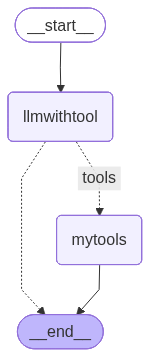

In [66]:
from IPython.display import Image, display
display(Image(app1.get_graph().draw_mermaid_png()))


In [67]:
response=app1.invoke({"messages":["what is a weather in bengraluru?"]})


In [68]:
response["messages"][-1].content


'the temp is 25 degree and cloudy'

In [70]:
app1.invoke({"messages":["what is a weather in delhi?"]})


{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='f8193793-4566-4e94-8183-37608591906b'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 't0vf3whbp', 'function': {'arguments': '{"query":"weather in delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 224, 'total_tokens': 240, 'completion_time': 0.018913107, 'prompt_time': 0.012207823, 'queue_time': 0.049113217, 'total_time': 0.03112093}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ab04adca7d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--23bf9910-a856-440b-a092-f3030e34e1e5-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in delhi'}, 'id': 't0vf3whbp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 224, 'output_tokens': 16, 'total_tokens': 240}),
  ToolMessage(content='

In [71]:
app1.invoke({"messages":["hi how are you?"]})


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='292b7016-fb94-423d-a084-5a5f559a8886'),
  AIMessage(content="I'm functioning properly, thanks for asking. What can I assist you with today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 221, 'total_tokens': 239, 'completion_time': 0.032462188, 'prompt_time': 0.012164574, 'queue_time': 0.048988266, 'total_time': 0.044626762}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_e32974efee', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--652d5929-fbe6-4d5a-92db-3919d540d96e-0', usage_metadata={'input_tokens': 221, 'output_tokens': 18, 'total_tokens': 239})]}